# Group Project: Web Scraping List of U.S. States by Population

### Author: <font color='red'> Stella Olveira </font>

In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [10]:
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population"

# User-Agent to avoid blocking
headers = {'User-Agent': 'Mozilla/5.0'}

# Make request
req = Request(url, headers=headers)
page = urlopen(req).read()

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(page, "lxml")

In [29]:
table = soup.find("table", {"class": "wikitable"})
# Extract table headers
headers = []
for th in table.find_all("th"):
    headers.append(th.text.strip())
# Extract all rows
rows = []
for tr in table.find_all("tr")[1:]:  # skip header row
    cells = tr.find_all(["td", "th"])
    row = [cell.text.strip() for cell in cells]
    if row:
        rows.append(row)
# Create DataFrame
df = pd.DataFrame(rows)

In [12]:
print("FIRST 10 ROWS OF SCRAPED DATA:\n")
print(df.head(10))


FIRST 10 ROWS OF SCRAPED DATA:

                    0              1           2       3          4   5   \
0  July 1, 2024 (est.)  April 1, 2020           %    Abs.      Seats   %   
1           California     39,431,263  39,538,223   6.13%  2,284,267  52   
2                Texas     31,290,831  29,145,505  15.91%  3,999,944  38   
3              Florida     23,372,215  21,538,187  14.56%  2,736,877  28   
4             New York     19,867,248  20,201,249   4.25%    823,147  26   
5         Pennsylvania     13,078,751  13,002,700   2.36%    300,321  17   
6             Illinois     12,710,158  12,812,508  −0.14%    −18,124  17   
7                 Ohio     11,883,304  11,799,448   2.28%    262,944  15   
8              Georgia     11,180,878  10,711,908  10.57%  1,024,255  14   
9       North Carolina     11,046,024  10,439,388   9.48%    903,905  14   

       6        7        8        9       10  
0    None     None     None     None    None  
1  11.95%  732,189  760,350  11.800% 

In [13]:
df.to_csv("CSC221-webscrape-data.csv", index=False)
print("\nCSV saved as 'CSC221-webscrape-data.csv'")


CSV saved as 'CSC221-webscrape-data.csv'


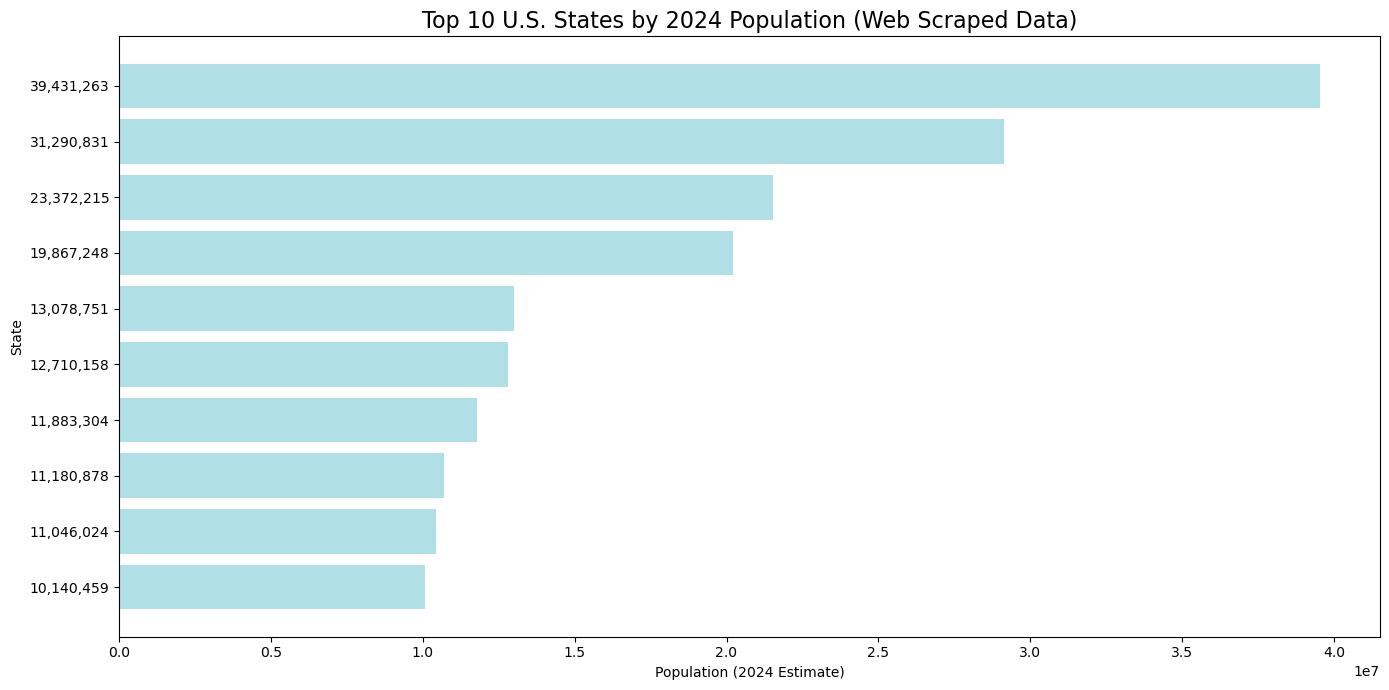

In [27]:
import matplotlib.pyplot as plt
df_clean = df.copy()

# Remove the first row (it contains label text instead of data)
df_clean = df_clean.iloc[1:].reset_index(drop=True)

# Rename useful columns
df_clean = df_clean.rename(columns={
    1: "State",
    2: "Population_2024"
})

# Remove commas and convert to numeric
df_clean["Population_2024"] = (
    df_clean["Population_2024"]
    .str.replace(",", "", regex=False)
    .astype(float)
)


df_clean = df_clean.dropna(subset=["Population_2024"])

# Select the first 10 states
plot_df = df_clean.head(10)

# Create bar chart
plt.figure(figsize=(14, 7))
plt.barh(plot_df["State"], plot_df["Population_2024"], color="#B0E0E6")
plt.xlabel("Population (2024 Estimate)")
plt.ylabel("State")
plt.title("Top 10 U.S. States by 2024 Population (Web Scraped Data)", fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
